In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor


In [4]:
df=pd.read_csv('/content/house_prices_dataset.csv')
df.head()

,square_feet,num_rooms,age,distance_to_city(km),price
0,2248.357077,3,92,22.997972,200374.090410
1,1930.867849,2,22,13.984254,268784.847337
2,2323.844269,6,33,21.500945,315020.857676
3,2761.514928,3,63,10.343638,355111.468459
4,1882.923313,7,54,25.485200,234197.123903


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   square_feet           10000 non-null  float64
 1   num_rooms             10000 non-null  int64  
 2   age                   10000 non-null  int64  
 3   distance_to_city(km)  10000 non-null  float64
 4   price                 10000 non-null  float64
dtypes: float64(3), int64(2)
memory usage: 390.8 KB


In [6]:
df.isnull().sum()

,0
square_feet,0
num_rooms,0
age,0
distance_to_city(km),0
price,0


In [7]:
df.describe()

,square_feet,num_rooms,age,distance_to_city(km),price
count,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1999.147496,4.49510,49.516900,15.362148,263011.571609
std,501.021194,1.71116,28.992336,8.325101,98336.945117
min,500.000000,2.00000,0.000000,1.000161,-95613.138249
25%,1663.704735,3.00000,24.000000,8.121636,196791.510684
50%,1998.702512,4.00000,49.000000,15.403146,262497.361236
75%,2335.540444,6.00000,75.000000,22.447530,330445.581908
max,3963.118853,7.00000,99.000000,29.993892,660168.255648


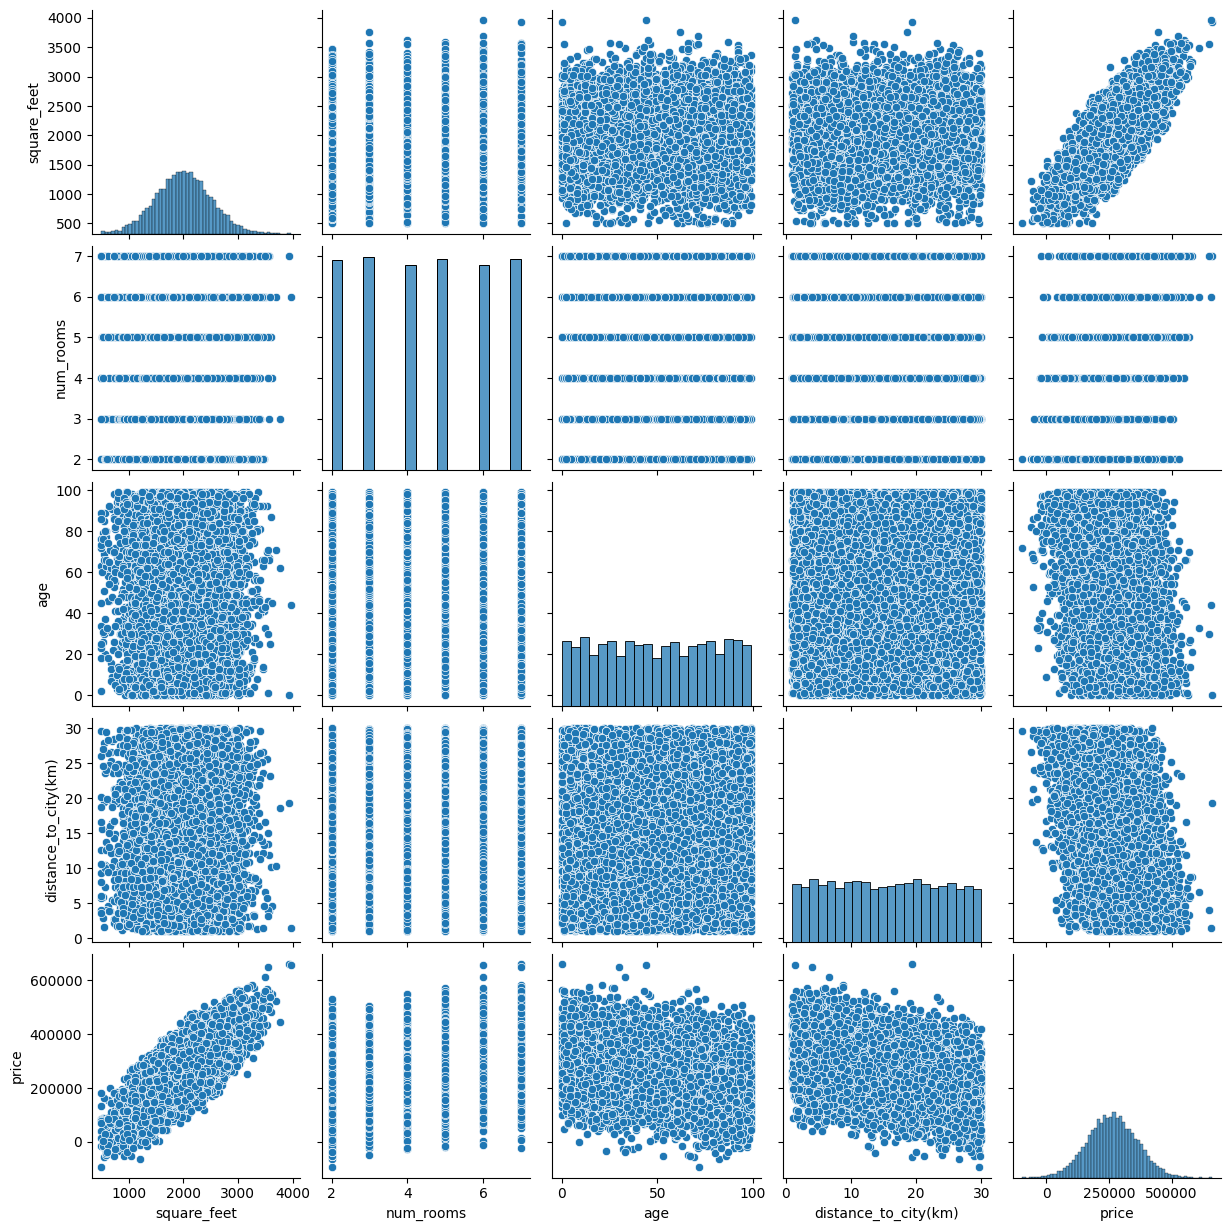

In [9]:
sns.pairplot(df)

{'whiskers': [<matplotlib.lines.Line2D at 0x7b44957f6f90>,
 'caps': [<matplotlib.lines.Line2D at 0x7b44958009e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7b44957f51f0>],
 'medians': [<matplotlib.lines.Line2D at 0x7b4495802150>],
 'fliers': [<matplotlib.lines.Line2D at 0x7b44958030b0>],
 'means': []}

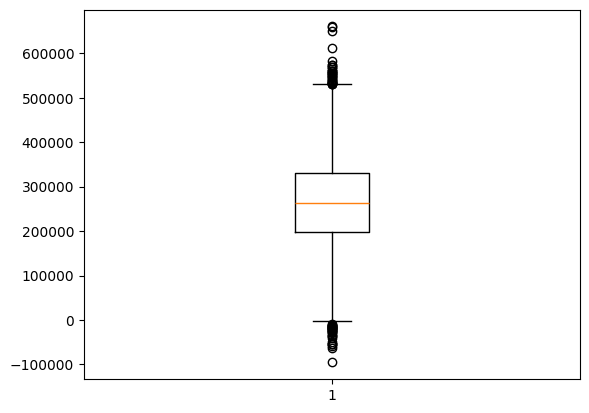

In [12]:
plt.boxplot(df['price'])

In [16]:
outliers=df.copy()
for i in outliers:
  if outliers[i].dtypes=='int64' or outliers[i].dtypes=='float64':
    Q1=outliers[i].quantile(0.25)
    Q3=outliers[i].quantile(0.75)
    IQR=Q3-Q1
    lower_limit=Q1-1.5*IQR
    upper_limit=Q3+1.5*IQR
    outliers=outliers[(outliers[i]>=lower_limit) & (outliers[i]<=upper_limit)]

# Filter out rows with negative price
outliers = outliers[outliers['price'] >= 0]

{'whiskers': [<matplotlib.lines.Line2D at 0x7b448f0652e0>,
 'caps': [<matplotlib.lines.Line2D at 0x7b448f0658b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7b448f064fe0>],
 'medians': [<matplotlib.lines.Line2D at 0x7b448f065e20>],
 'fliers': [<matplotlib.lines.Line2D at 0x7b448f065fd0>],
 'means': []}

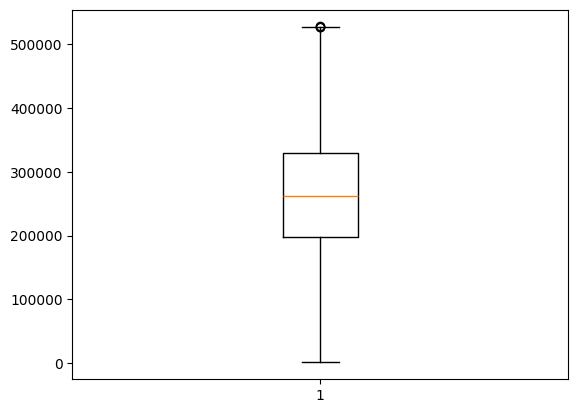

In [17]:
plt.boxplot(outliers['price'])

In [18]:
outliers.describe()

,square_feet,num_rooms,age,distance_to_city(km),price
count,9870.000000,9870.000000,9870.000000,9870.000000,9870.000000
mean,1999.755906,4.495441,49.484498,15.361282,263181.011132
std,480.670785,1.707906,28.997645,8.309550,94557.355242
min,662.716436,2.000000,0.000000,1.000161,1059.396373
25%,1670.976997,3.000000,24.000000,8.134643,197625.914595
50%,1999.114272,4.000000,49.000000,15.408926,262554.780923
75%,2331.233885,6.000000,75.000000,22.405438,329473.764575
max,3333.452611,7.000000,99.000000,29.993892,528165.699858


<Axes: >

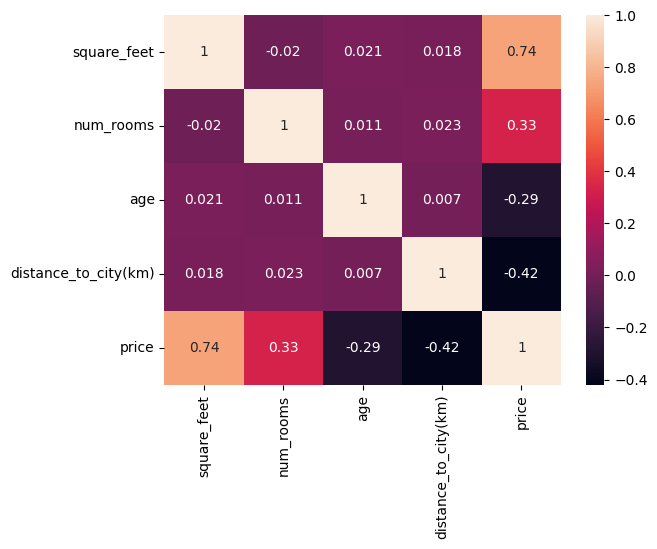

In [26]:
sns.heatmap(outliers.corr(),annot=True)

In [20]:
X=outliers.drop('price',axis=1)
y=outliers['price']

In [23]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [24]:
lr=LinearRegression()
lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)


In [30]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"R2 Score: {r2:.4f}")


Root Mean Squared Error: 20034.28
R2 Score: 0.9532


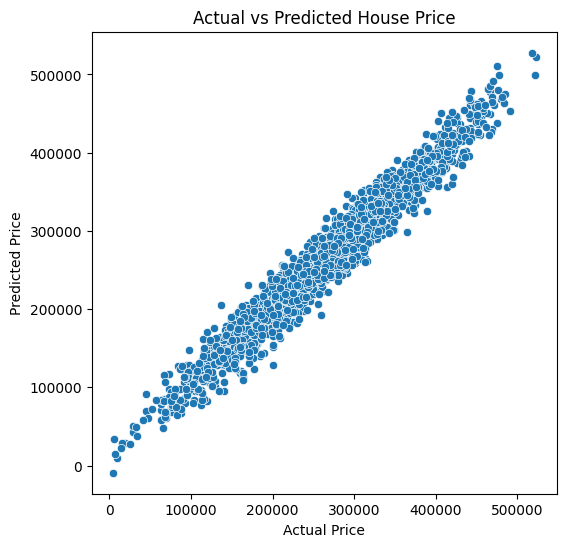

In [31]:
plt.figure(figsize=(6,6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted House Price")
plt.show()


In [33]:
coef_df = pd.DataFrame(lr.coef_, X.columns, columns=['Coefficient'])
print(coef_df)

                       Coefficient
square_feet           72113.469916
num_rooms             34278.277102
age                  -29147.908685
distance_to_city(km) -41467.762001


In [36]:
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

print("R2 Score (Random Forest):", r2_score(y_test, rf_pred))


R2 Score (Random Forest): 0.9391015559672613
